In [ ]:
#introducing libraries
!pip install numpy scipy pandas>1.0 matplotlib

In [ ]:
#calling up libraries
from datetime import datetime
import pandas as pd
import numpy as np
import scipy
import scipy.integrate as integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
#import CSV data from drive
from google.colab import drive
import glob
import os
drive.mount('drive', force_remount=True)
folder = "/content/drive/MyDrive/OPV fabrication Solvent Based 01-12-20 Emma and Dan/JV sweeps/P3HT-PCBM 0.1.12.20"
all_files_AV = glob.glob(os.path.join(folder, '*.csv'))
AV_li = {}
for filename in all_files_AV:
  #isolates name from file and drops last 3 rows
  AV_li[filename[123:].replace(".csv", "")] = pd.read_csv(filename, sep = ',' , header = 1, nrows = 61)

pixelarea = .02365
AV_li[' 120C solvent then 150C anneal-5']

Mounted at drive


,V,mA/cm^2,mA/cm^2.1,mA/cm^2.2,mA/cm^2.3,mA/cm^2.4,mA/cm^2.5,mA/cm^2.6,mA/cm^2.7
0,0.00,-7.98732,-8.06765,-8.27061,-7.57294,-7.95772,-8.14376,-8.13531,-7.66173
1,0.02,-7.94926,-8.04651,-8.22833,-7.51797,-7.92389,-8.11839,-8.11839,-7.62791
2,0.04,-7.91966,-8.00423,-8.19873,-7.48837,-7.89006,-8.09725,-8.08879,-7.57294
3,0.06,-7.90275,-7.97463,-8.16913,-7.44186,-7.86047,-8.05920,-8.05074,-7.52220
4,0.08,-7.86047,-7.93235,-8.13953,-7.39958,-7.81818,-8.05074,-8.03805,-7.47146
...,...,...,...,...,...,...,...,...,...
56,1.12,141.95800,143.67400,146.85000,153.59800,81.06980,117.76300,110.10600,121.84400
57,1.14,148.68900,150.35100,153.67400,160.71000,84.58770,123.37400,115.02700,127.35300
58,1.16,155.16300,156.84600,160.29200,167.67400,87.92810,128.70600,119.74600,132.56700
59,1.18,161.87700,163.59000,167.16300,174.88400,91.56030,134.33000,124.65100,138.10600


In [ ]:
def get_vals(input_data, num):
  x=np.asarray(input_data['V'])
  if num == 0:
    y=np.asarray(input_data['mA/cm^2'])
  else:
    y=np.asarray(input_data['mA/cm^2.'+str(num)])
  #creates spline cubic interpolation function
  f = interp1d(x, y, 'cubic')
  #get zeroes from interpolation 
  Jsc = float(f(0))
 
  if len(scipy.interpolate.InterpolatedUnivariateSpline(x, y).roots()) == 0:
    Voc = np.nan
  else:
     Voc = scipy.interpolate.InterpolatedUnivariateSpline(x, y).roots().astype(float)[0]
  #plot x*y vs x to get P vs V
  PvsVdata = pd.DataFrame(np.stack((x, x*y), axis =-1), columns=('Voltage(V)', 'Power(W)'))
  #other relevant quantities
  Pmax = min(PvsVdata['Power(W)'])
  FF = Pmax /(Jsc*Voc)
  #Irradiance from spectral data
  Ispec = 99.1
  PCE = -Pmax / (Ispec) * 100
  return {'Test':name, 'Pixel': 'Pixel'+str(num+1), 'Jsc (mA/cm^2)':Jsc, 'Voc (V)':Voc, 'Pmax (mW/cm^2)':Pmax, 'FF':FF , 'PCE(%)':PCE}


In [ ]:
df = pd.DataFrame(columns = ['Test','Pixel', 'Jsc (mA/cm^2)', 'Voc (V)', 'Pmax (mW/cm^2)', 'FF', 'PCE(%)'])
for name in AV_li:
  for i in range(8):
    df = df.append(get_vals(AV_li[name], i), ignore_index =True)
df


,Test,Pixel,Jsc (mA/cm^2),Voc (V),Pmax (mW/cm^2),FF,PCE(%)
0,150C anneal-1,Pixel1,-7.505290,0.575072,-2.651163,0.614252,2.675240
1,150C anneal-1,Pixel2,-2.794930,0.018095,-0.000000,0.000000,0.000000
2,150C anneal-1,Pixel3,-7.255810,0.329031,-0.723890,0.303215,0.730464
3,150C anneal-1,Pixel4,-7.192390,0.548586,-1.815644,0.460164,1.832133
4,150C anneal-1,Pixel5,-7.124740,0.211832,-0.410486,0.271981,0.414214
5,150C anneal-1,Pixel6,-7.551800,0.557165,-2.137844,0.508091,2.157259
6,150C anneal-1,Pixel7,-4.765330,0.035106,-0.041438,0.247700,0.041814
7,150C anneal-1,Pixel8,-2.917550,0.023135,-0.007949,0.117769,0.008021
8,150C anneal-2,Pixel1,-7.378440,0.610139,-2.483807,0.551728,2.506364
9,150C anneal-2,Pixel2,-6.875260,0.613390,-2.138182,0.507013,2.157601


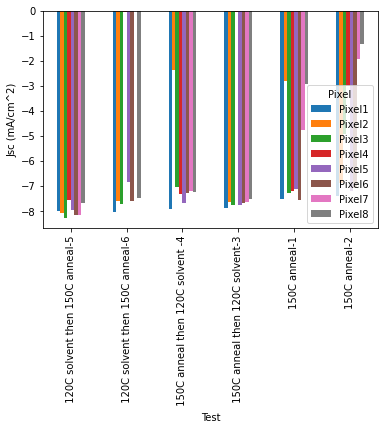

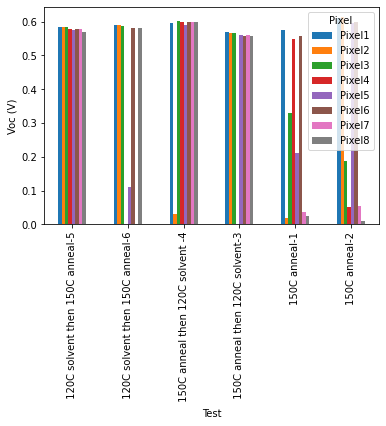

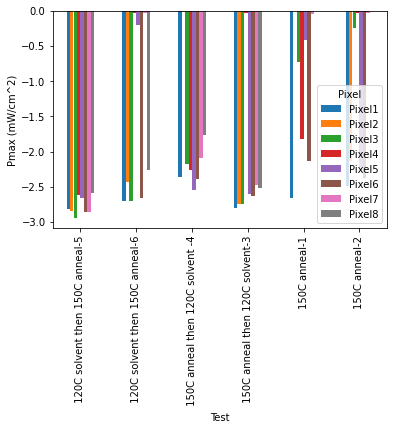

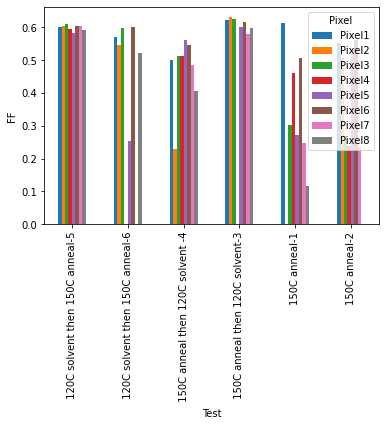

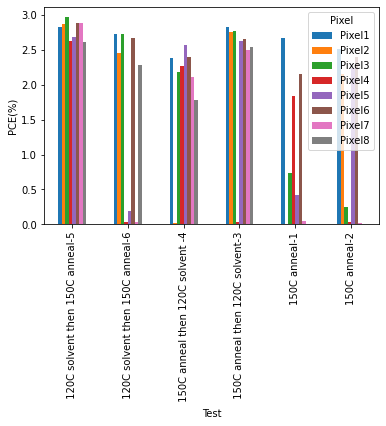

In [ ]:
for i in range(5):  
  df.pivot(index='Test', columns='Pixel', values=list(df)[i+2]).plot(kind='bar', ylabel=list(df)[i+2])

In [ ]:
#new variation on code to replicate Dr. Lidzey's group's analysis
new_data = {'150C anneal':[], '150C anneal then 120C solvent':[], '120C solvent then 150C anneal':[]}
def data_clean(data):
  for name in AV_li:
    AV_li[name].set_index('V')
    for run in list(AV_li[name]):

    if name[-1] == '1' or name[-1] == '2':


IndentationError: ignored